## Importing necessary modules

In [4]:
import numpy as np
from timeit import default_timer as timer
import jax
import jax.numpy as jnp
import sympy as sym
import pprint
import matplotlib.pyplot as plt
import  pandas as pd

## Problem 1
First of all in a matrix multiplication between a (n, k) and (k, m) matrix, the resulting matrix would be of the shape (n, m). That means there would be a total of n*m elements. Therefore, if we can find the number of additions and multiplications required for any one element, we can calculate the total number of multiplications and additions.

$
\begin{bmatrix}
     a_{11} & a_{12} & \cdots & a_{1n}\\
     a_{21} & a_{22} & \cdots & a_{2n}\\
     \vdots & \vdots & \ddots & \vdots\\
     a_{m1} & a_{m2} & \cdots & a_{mn}
 \end{bmatrix}
 \times
 \begin{bmatrix}
     b_{11} & b_{12} & \cdots & b_{1p}\\
     b_{21} & b_{22} & \cdots & b_{2p}\\
     \vdots & \vdots & \ddots & \vdots\\
     b_{n1} & b_{n2} & \cdots & b_{np}
 \end{bmatrix}
  =
 \begin{bmatrix}
     c_{11} & c_{12} & \cdots & c_{1p}\\
     c_{21} & c_{22} & \cdots & c_{2p}\\
     \vdots & \vdots & \ddots & \vdots\\
     c_{m1} & c_{m2} & \cdots & c_{mp}
 \end{bmatrix}
$

$c_{ij} = a_{i1} b_{1j} + a_{i2} b_{2j} + \cdots + a_{in} b_{nj} = \sum_{k=1}^n a_{ik}b_{kj} $

This shows that for every element there would be and k multiplications.

Therefore, we would have a total of $n*(k-1)*m$ additions and $n*k*m$ multiplications.

In [ ]:
n = 3
k = 2
m = 3

np.random.seed(42)
mat_1 = np.random.rand(n, k)
mat_2 = np.random.rand(k, m)
result = np.zeros((n, m))
total_multiplications, total_additions = 0, 0

for i in range(n):
  for j in range(m):
    element = 0
    for l in range(k):
      if(element == 0):
        total_additions -= 1
      element += mat_1[i][l]*mat_2[l][j]
      total_multiplications += 1
      total_additions += 1

    result[i][j] = element

print(result)
print(f"Total additions is {total_additions} which is {n}*{k-1}*{m} (n*(k-1)*m)")
print(f"Total multiplications is {total_multiplications} which is {n}*{k}*{m} (n*k*m)")

[[0.69492937 0.34398769 1.14724886]
 [0.46641051 0.64635877 1.02065731]
 [0.11951757 0.13835069 0.24508577]]
Total additions is 9 which is 3*1*3 (n*(k-1)*m)
Total multiplications is 18 which is 3*2*3 (n*k*m)


## Problem 2

NumPy operations are faster than regular loops using lists because of the following reasons:  

- An array is a collection of homogeneous data-types that are stored in contiguous memory locations. On the other hand, a list in Python is a collection of heterogeneous data types stored in non-contiguous memory locations.
- The NumPy package breaks down a task into multiple fragments and then processes all the fragments parallelly.
- The NumPy package integrates C, C++, and Fortran codes in Python. These programming languages have very little execution time compared to Python. Many times Python is used to create wrapper functions for libraries in these languages to make it more simple to use.

*Cited from [GeeksForGeeks](https://www.geeksforgeeks.org/why-numpy-is-faster-in-python/)*

In [68]:
n = 6
k = 3
m = 6
num_intervals = 1000
total_manual_time = 0
total_numpy_time = 0

np.random.seed(42)

for _ in range(num_intervals):
    mat_1 = np.random.rand(n, k)
    mat_2 = np.random.rand(k, m)

    start_time_manual = timer()
    result_manual = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            element = 0
            for l in range(k):
                element += mat_1[i][l] * mat_2[l][j]
            result_manual[i][j] = element

    end_time_manual = timer()
    total_manual_time += end_time_manual - start_time_manual

    start_time_numpy = timer()
    result_numpy = np.matmul(mat_1, mat_2)
    end_time_numpy = timer()
    total_numpy_time += end_time_numpy - start_time_numpy

# Calculate average time
average_manual_time = total_manual_time / num_intervals
average_numpy_time = total_numpy_time / num_intervals

print(f"Manual result:\n{result_manual}\nIt took an average of {average_manual_time:.5f} seconds over {num_intervals} intervals.")
print(f"Numpy result:\n{result_numpy}\nIt took an average of {average_numpy_time:.5f} seconds over {num_intervals} intervals.")


Manual result:
[[0.84283758 0.46205503 0.60170651 0.99422525 0.68589317 1.22319894]
 [1.43822406 0.91306628 1.55351478 1.92241153 1.69588015 1.95193211]
 [0.59845675 0.50242242 0.90981255 1.15621815 1.06570023 0.7756766 ]
 [0.89264582 0.48250827 0.84670546 0.91472171 0.84417529 1.21249489]
 [0.37669041 0.25861178 0.10210857 0.74309765 0.2881779  0.63691734]
 [1.03755574 0.62495558 1.11538198 1.25322715 1.1655913  1.39272311]]
It took an average of 0.00020 seconds over 1000 intervals.
Numpy result:
[[0.84283758 0.46205503 0.60170651 0.99422525 0.68589317 1.22319894]
 [1.43822406 0.91306628 1.55351478 1.92241153 1.69588015 1.95193211]
 [0.59845675 0.50242242 0.90981255 1.15621815 1.06570023 0.7756766 ]
 [0.89264582 0.48250827 0.84670546 0.91472171 0.84417529 1.21249489]
 [0.37669041 0.25861178 0.10210857 0.74309765 0.2881779  0.63691734]
 [1.03755574 0.62495558 1.11538198 1.25322715 1.1655913  1.39272311]]
It took an average of 0.00003 seconds over 1000 intervals.


## Problem 3


In [35]:
size = 100
np.random.seed(42)
arr = np.random.randint(1, size, size = size)
arr

array([52, 93, 15, 72, 61, 21, 83, 87, 75, 75, 88, 24,  3, 22, 53,  2, 88,
       30, 38,  2, 64, 60, 21, 33, 76, 58, 22, 89, 49, 91, 59, 42, 92, 60,
       80, 15, 62, 62, 47, 62, 51, 55, 64,  3, 51,  7, 21, 73, 39, 18,  4,
       89, 60, 14,  9, 90, 53,  2, 84, 92, 60, 71, 44,  8, 47, 35, 78, 81,
       36, 50,  4,  2,  6, 54,  4, 54, 93, 63, 18, 90, 44, 34, 74, 62, 14,
       95, 48, 15, 72, 78, 87, 62, 40, 85, 80, 82, 53, 24, 26, 89])

In [67]:
# Method 1
total_time = 0
num_intervals = 1000


for _ in range(num_intervals):
    # Assuming arr is defined and contains the data you want to process

    start_time = timer()
    n = len(arr)

    for i in range(n // 2 + 1):
        max_val = arr[0]
        max_ind = 0
        for j in range(n - i):
            if max_val < arr[j]:
                max_val = arr[j]
                max_ind = j

        arr[max_ind], arr[n - i - 1] = arr[n - i - 1], arr[max_ind]

    end_time = timer()
    total_time += end_time - start_time

# Calculate average time
average_time = total_time / num_intervals

if n % 2 != 0:
    median = arr[n // 2]
else:
    median = (arr[n // 2] + arr[n // 2 - 1]) / 2

print(f"Average time over {num_intervals} intervals: {average_time:.5f} seconds")

Average time over 1000 intervals: 0.00425 seconds


The time complexity of this method is $O(n^2)$.

A better method could be sorting it first using an efficient algorithm (maybe of the order $O(nlog(n))$ like merge sort) and then find the middle elements and that would give us the median.

(Merge sort code taken from [GeeksForGeeks](https://www.geeksforgeeks.org/python-program-for-merge-sort/))

In [42]:
# Method 2
start_time = timer()

def merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid

    left_partition = [0] * (n1)
    right_partition = [0] * (n2)

    for i in range(0, n1):
        left_partition[i] = arr[left + i]

    for j in range(0, n2):
        right_partition[j] = arr[mid + 1 + j]

    i = 0
    j = 0
    k = left

    while i < n1 and j < n2:
        if left_partition[i] <= right_partition[j]:
            arr[k] = left_partition[i]
            i += 1
        else:
            arr[k] = right_partition[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = left_partition[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = right_partition[j]
        j += 1
        k += 1

def mergeSort(arr, left, right):
    if left < right:
        mid = left + (right - left) // 2
        mergeSort(arr, left, mid)
        mergeSort(arr, mid + 1, right)
        merge(arr, left, mid, right)

for _ in range(num_intervals):
    start_time = timer()

    mergeSort(arr, 0, len(arr) - 1)

    if len(arr) % 2 != 0:
        median = arr[len(arr) // 2]
    else:
        median = (arr[len(arr) // 2 - 1] + arr[len(arr) // 2]) / 2

    end_time = timer()
    total_time += end_time - start_time

# Calculate average time
average_time = total_time / num_intervals

print(f"Average time over {num_intervals} intervals: {average_time:.5f} seconds")

Average time over 1000 intervals: 0.00212 seconds


In [65]:
for _ in range(num_intervals):
    start_time = timer()
    median = np.median(arr)
    end_time = timer()
    total_time += end_time - start_time

# Calculate average time
average_time = total_time / num_intervals

print(f"Average time over {num_intervals} intervals: {average_time:.5f} seconds")

Average time over 1000 intervals: 0.00129 seconds


## Problem 4

Assuming that the gradient means the partial derivative of the function wrt the given independent variable:

$\frac{\partial (x^2y + y^3sin(x))}{\partial x} = 2xy + y^3cos(x)$

$\frac{\partial (x^2y + y^3sin(x))}{\partial y} = x^2 + 3y^2sin(x)$


## Problem 5

In [ ]:
def f(x, y):
  return x**2*y + y**3*jnp.sin(x)

dfdx = jax.grad(f, argnums = 0)
dfdy = jax.grad(f, argnums = 1)

In [ ]:
def partial_x(x, y):
  return 2*x*y + np.cos(x)*y**3

def partial_y(x, y):
  return x**2 + 3*y**2*np.sin(x)

test_datapoints = np.array([[0.0, 0.0],
                            [1.0, 0.0],
                            [0.0, 1.0],
                            [1.0, 1.0],
                            [5.0, 6.0]])

for i in test_datapoints:
  print(f"Datapoint: {i}\nCorresponding partial x derivative (jax): {dfdx(*i):.5f}\nCorresponding partial x derivative (analytical): {partial_x(*i):.5f}")
  print(f"Corresponding partial y derivative (jax): {dfdy(*i):.5f}\nCorresponding partial y derivative (analytical): {partial_y(*i):.5f}")
  print("---------------------------------------------------------")

Datapoint: [0. 0.]
Corresponding partial x derivative (jax): 0.00000
Corresponding partial x derivative (analytical): 0.00000
Corresponding partial y derivative (jax): 0.00000
Corresponding partial y derivative (analytical): 0.00000
---------------------------------------------------------
Datapoint: [1. 0.]
Corresponding partial x derivative (jax): 0.00000
Corresponding partial x derivative (analytical): 0.00000
Corresponding partial y derivative (jax): 1.00000
Corresponding partial y derivative (analytical): 1.00000
---------------------------------------------------------
Datapoint: [0. 1.]
Corresponding partial x derivative (jax): 1.00000
Corresponding partial x derivative (analytical): 1.00000
Corresponding partial y derivative (jax): 0.00000
Corresponding partial y derivative (analytical): 0.00000
---------------------------------------------------------
Datapoint: [1. 1.]
Corresponding partial x derivative (jax): 2.54030
Corresponding partial x derivative (analytical): 2.54030
C

## Problem 6


In [ ]:
x, y = sym.symbols('x y')
f = x**2*y+ y**3*sym.sin(x)

print(f"Differential wrt x: {f.diff(x)}")
print(f"Differential wrt y: {f.diff(y)}")

Differential wrt x: 2*x*y + y**3*cos(x)
Differential wrt y: x**2 + 3*y**2*sin(x)


## Problem 7

In [ ]:
student_records = {
    2022: {
        'Computer Science': {
            1: {
                'Name': 'Sujal Patel',
                'Marks': {
                    'Maths': 90,
                    'English': 85,
                    'Science': 78
                }
            },
            2: {
                'Name': 'Pratham Sharda',
                'Marks': {
                    'Maths': 85,
                    'English': 92,
                    'Science': 88
                }
            },
            3: {
                'Name': 'Hardik Pandya',
                'Marks': {
                    'Maths': 78,
                    'English': 80,
                    'Science': 75
                }
            }
        },
        'Electrical Engineering': {
            4: {
                'Name': 'Siddharth Doshi',
                'Marks': {
                    'Maths': 92,
                    'English': 89,
                    'Science': 94
                }
            },
            5: {
                'Name': 'Mumuksh Jain',
                'Marks': {
                    'Maths': 87,
                    'English': 78,
                    'Science': 85
                }
            },
            6: {
                'Name': 'Shreyans Jain',
                'Marks': {
                    'Maths': 80,
                    'English': 82,
                    'Science': 79
                }
            }
        },
        'Mechanical Engineering': {
            7: {
                'Name': 'Viraj Vekaria',
                'Marks': {
                    'Maths': 85,
                    'English': 88,
                    'Science': 90
                }
            },
            8: {
                'Name': 'Hardik Jain',
                'Marks': {
                    'Maths': 94,
                    'English': 91,
                    'Science': 85
                }
            },
            9: {
                'Name': 'Abhijit Venkat',
                'Marks': {
                    'Maths': 78,
                    'English': 76,
                    'Science': 80
                }
            }
        }
    },
    2023: {
        'Computer Science': {
            10: {
                'Name': 'Harsh Nair',
                'Marks': {
                    'Maths': 90,
                    'English': 85,
                    'Science': 88
                }
            },
            11: {
                'Name': 'Manas Punekar',
                'Marks': {
                    'Maths': 85,
                    'English': 92,
                    'Science': 78
                }
            },
            12: {
                'Name': 'Dimple Mehta',
                'Marks': {
                    'Maths': 78,
                    'English': 80,
                    'Science': 75
                }
            }
        },
        'Electrical Engineering': {
            13: {
                'Name': 'Diya Desai',
                'Marks': {
                    'Maths': 92,
                    'English': 89,
                    'Science': 94
                }
            },
            14: {
                'Name': 'Nishi Shah',
                'Marks': {
                    'Maths': 87,
                    'English': 78,
                    'Science': 85
                }
            },
            15: {
                'Name': 'Dhairya Joshi',
                'Marks': {
                    'Maths': 80,
                    'English': 82,
                    'Science': 79
                }
            }
        },
        'Mechanical Engineering': {
            16: {
                'Name': 'Rohan Kapoor',
                'Marks': {
                    'Maths': 85,
                    'English': 88,
                    'Science': 90
                }
            },
            17: {
                'Name': 'Jiya Verma',
                'Marks': {
                    'Maths': 94,
                    'English': 91,
                    'Science': 85
                }
            },
            18: {
                'Name': 'Vikas Sharma',
                'Marks': {
                    'Maths': 78,
                    'English': 76,
                    'Science': 80
                }
            }
        }
    },
    2024: {
        'Computer Science': {
            19: {
                'Name': 'Neha Patel',
                'Marks': {
                    'Maths': 90,
                    'English': 85,
                    'Science': 88
                }
            },
            20: {
                'Name': 'Rahul Sharma',
                'Marks': {
                    'Maths': 85,
                    'English': 92,
                    'Science': 78
                }
            },
            21: {
                'Name': 'Aishwarya Desai',
                'Marks': {
                    'Maths': 78,
                    'English': 80,
                    'Science': 75
                }
            }
        },
        'Electrical Engineering': {
            22: {
                'Name': 'Arjun Shah',
                'Marks': {
                    'Maths': 92,
                    'English': 89,
                    'Science': 94
                }
            },
            23: {
                'Name': 'Pooja Jain',
                'Marks': {
                    'Maths': 87,
                    'English': 78,
                    'Science': 85
                }
            },
            24: {
                'Name': 'Rohit Mehta',
                'Marks': {
                    'Maths': 80,
                    'English': 82,
                    'Science': 79
                }
            }
        },
        'Mechanical Engineering': {
            25: {
                'Name': 'Tanvi Sharma',
                'Marks': {
                    'Maths': 85,
                    'English': 88,
                    'Science': 90
                }
            },
            26: {
                'Name': 'Rajat Kapoor',
                'Marks': {
                    'Maths': 94,
                    'English': 91,
                    'Science': 85
                }
            },
            27: {
                'Name': 'Aanya Verma',
                'Marks': {
                    'Maths': 78,
                    'English': 76,
                    'Science': 80
                }
            }
        }
    },
    2025: {
        'Computer Science': {
            28: {
                'Name': 'Rahul Nair',
                'Marks': {
                    'Maths': 90,
                    'English': 85,
                    'Science': 88
                }
            },
            29: {
                'Name': 'Juhi Punekar',
                'Marks': {
                    'Maths': 85,
                    'English': 92,
                    'Science': 78
                }
            },
            30: {
                'Name': 'Vishal Mehta',
                'Marks': {
                    'Maths': 78,
                    'English': 80,
                    'Science': 75
                }
            }
        },
        'Electrical Engineering': {
            31: {
                'Name': 'Aditi Desai',
                'Marks': {
                    'Maths': 92,
                    'English': 89,
                    'Science': 94
                }
            },
            32: {
                'Name': 'Kunal Shah',
                'Marks': {
                    'Maths': 87,
                    'English': 78,
                    'Science': 85
                }
            },
            33: {
                'Name': 'Isha Joshi',
                'Marks': {
                    'Maths': 80,
                    'English': 82,
                    'Science': 79
                }
            }
        },
        'Mechanical Engineering': {
            34: {
                'Name': 'Aarav Vekaria',
                'Marks': {
                    'Maths': 85,
                    'English': 88,
                    'Science': 90
                }
            },
            35: {
                'Name': 'Mira Jain',
                'Marks': {
                    'Maths': 94,
                    'English': 91,
                    'Science': 85
                }
            },
            36: {
                'Name': 'Rohan Venkat',
                'Marks': {
                    'Maths': 78,
                    'English': 76,
                    'Science': 80
                }
            }
        }
    }
}

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(student_records)

{   2022: {   'Computer Science': {   1: {   'Marks': {   'English': 85,
                                                          'Maths': 90,
                                                          'Science': 78},
                                             'Name': 'Sujal Patel'},
                                      2: {   'Marks': {   'English': 92,
                                                          'Maths': 85,
                                                          'Science': 88},
                                             'Name': 'Pratham Sharda'},
                                      3: {   'Marks': {   'English': 80,
                                                          'Maths': 78,
                                                          'Science': 75},
                                             'Name': 'Hardik Pandya'}},
              'Electrical Engineering': {   4: {   'Marks': {   'English': 89,
                                                      

## Problem 8


In [ ]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

students_2022_cs = [
    Student(1, 'Sujal Patel', {'Maths': 90, 'English': 85, 'Science': 78}),
    Student(2, 'Pratham Sharda', {'Maths': 85, 'English': 92, 'Science': 88}),
    Student(3, 'Hardik Pandya', {'Maths': 78, 'English': 80, 'Science': 75})
]

students_2022_ee = [
    Student(4, 'Siddharth Doshi', {'Maths': 92, 'English': 89, 'Science': 94}),
    Student(5, 'Mumuksh Jain', {'Maths': 87, 'English': 78, 'Science': 85}),
    Student(6, 'Shreyans Jain', {'Maths': 80, 'English': 82, 'Science': 79})
]

students_2022_me = [
    Student(7, 'Viraj Vekaria', {'Maths': 85, 'English': 88, 'Science': 90}),
    Student(8, 'Hardik Jain', {'Maths': 94, 'English': 91, 'Science': 85}),
    Student(9, 'Abhijit Venkat', {'Maths': 78, 'English': 76, 'Science': 80})
]

branch_cs_2022 = Branch('Computer Science', students_2022_cs)
branch_ee_2022 = Branch('Electrical Engineering', students_2022_ee)
branch_me_2022 = Branch('Mechanical Engineering', students_2022_me)

year_2022 = Year(2022, [branch_cs_2022, branch_ee_2022, branch_me_2022])
database = [year_2022]

students_2023_cs = [
    Student(10, 'Harsh Nair', {'Maths': 90, 'English': 85, 'Science': 88}),
    Student(11, 'Manas Punekar', {'Maths': 85, 'English': 92, 'Science': 78}),
    Student(12, 'Dimple Mehta', {'Maths': 78, 'English': 80, 'Science': 75})
]

students_2023_ee = [
    Student(13, 'Diya Desai', {'Maths': 92, 'English': 89, 'Science': 94}),
    Student(14, 'Nishi Shah', {'Maths': 87, 'English': 78, 'Science': 85}),
    Student(15, 'Dhairya Joshi', {'Maths': 80, 'English': 82, 'Science': 79})
]

students_2023_me = [
    Student(16, 'Rohan Kapoor', {'Maths': 85, 'English': 88, 'Science': 90}),
    Student(17, 'Jiya Verma', {'Maths': 94, 'English': 91, 'Science': 85}),
    Student(18, 'Vikas Sharma', {'Maths': 78, 'English': 76, 'Science': 80})
]

branch_cs_2023 = Branch('Computer Science', students_2023_cs)
branch_ee_2023 = Branch('Electrical Engineering', students_2023_ee)
branch_me_2023 = Branch('Mechanical Engineering', students_2023_me)

year_2023 = Year(2023, [branch_cs_2023, branch_ee_2023, branch_me_2023])

students_2024_cs = [
    Student(19, 'Neha Patel', {'Maths': 90, 'English': 85, 'Science': 88}),
    Student(20, 'Rahul Sharma', {'Maths': 85, 'English': 92, 'Science': 78}),
    Student(21, 'Aishwarya Desai', {'Maths': 78, 'English': 80, 'Science': 75})
]

students_2024_ee = [
    Student(22, 'Arjun Shah', {'Maths': 92, 'English': 89, 'Science': 94}),
    Student(23, 'Pooja Jain', {'Maths': 87, 'English': 78, 'Science': 85}),
    Student(24, 'Rohit Mehta', {'Maths': 80, 'English': 82, 'Science': 79})
]

students_2024_me = [
    Student(25, 'Tanvi Sharma', {'Maths': 85, 'English': 88, 'Science': 90}),
    Student(26, 'Rajat Kapoor', {'Maths': 94, 'English': 91, 'Science': 85}),
    Student(27, 'Aanya Verma', {'Maths': 78, 'English': 76, 'Science': 80})
]

branch_cs_2024 = Branch('Computer Science', students_2024_cs)
branch_ee_2024 = Branch('Electrical Engineering', students_2024_ee)
branch_me_2024 = Branch('Mechanical Engineering', students_2024_me)

year_2024 = Year(2024, [branch_cs_2024, branch_ee_2024, branch_me_2024])

students_2025_cs = [
    Student(28, 'Rahul Nair', {'Maths': 90, 'English': 85, 'Science': 88}),
    Student(29, 'Juhi Punekar', {'Maths': 85, 'English': 92, 'Science': 78}),
    Student(30, 'Vishal Mehta', {'Maths': 78, 'English': 80, 'Science': 75})
]

students_2025_ee = [
    Student(31, 'Aditi Desai', {'Maths': 92, 'English': 89, 'Science': 94}),
    Student(32, 'Kunal Shah', {'Maths': 87, 'English': 78, 'Science': 85}),
    Student(33, 'Isha Joshi', {'Maths': 80, 'English': 82, 'Science': 79})
]

students_2025_me = [
    Student(34, 'Aarav Vekaria', {'Maths': 85, 'English': 88, 'Science': 90}),
    Student(35, 'Mira Jain', {'Maths': 94, 'English': 91, 'Science': 85}),
    Student(36, 'Rohan Venkat', {'Maths': 78, 'English': 76, 'Science': 80})
]

branch_cs_2025 = Branch('Computer Science', students_2025_cs)
branch_ee_2025 = Branch('Electrical Engineering', students_2025_ee)
branch_me_2025 = Branch('Mechanical Engineering', students_2025_me)

year_2025 = Year(2025, [branch_cs_2025, branch_ee_2025, branch_me_2025])

database.extend([year_2023, year_2024, year_2025])


## Problem 9

In [ ]:
def plotter(func):
  x = np.arange(0.5, 100, 0.5)
  y = func(x)
  plt.plot(x, y)
  plt.show()

Plot for $y=x$

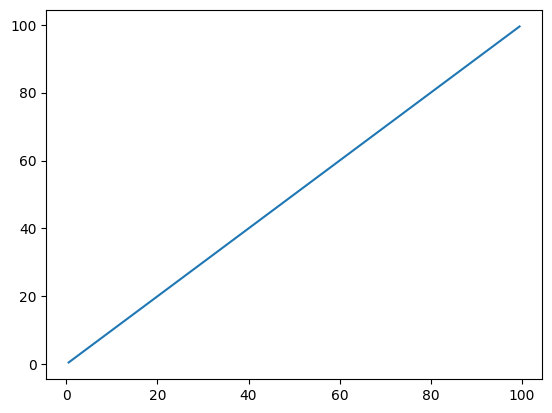

In [ ]:
func_1 = lambda x: x
plotter(func_1)

Plot for $x^2$

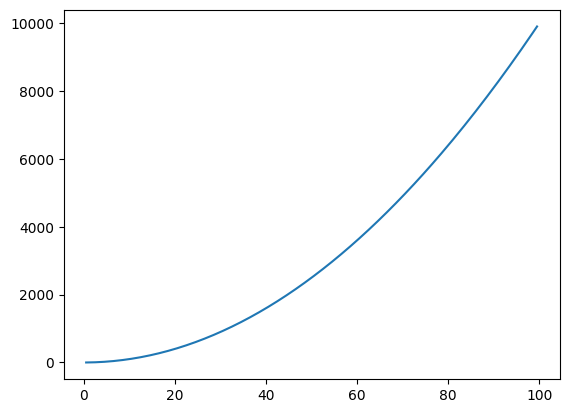

In [ ]:
func_1 = lambda x: x**2
plotter(func_1)

Plot for $\frac{x^3}{100}$

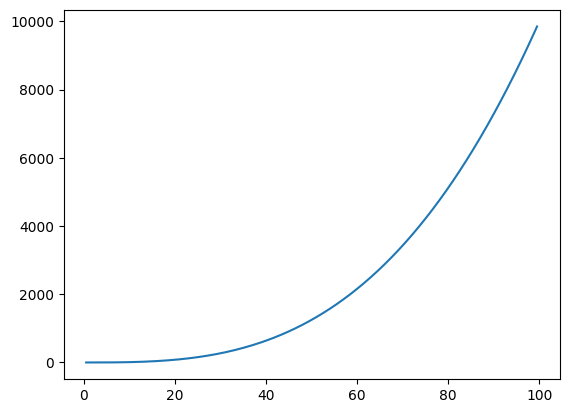

In [ ]:
func_1 = lambda x: x**3/100
plotter(func_1)

Plot for $sin(x)$

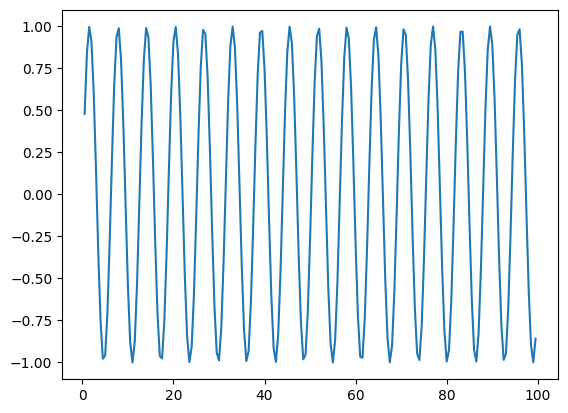

In [ ]:
func_1 = lambda x: np.sin(x)
plotter(func_1)

Plot for $\frac{sin(x)}{x}$

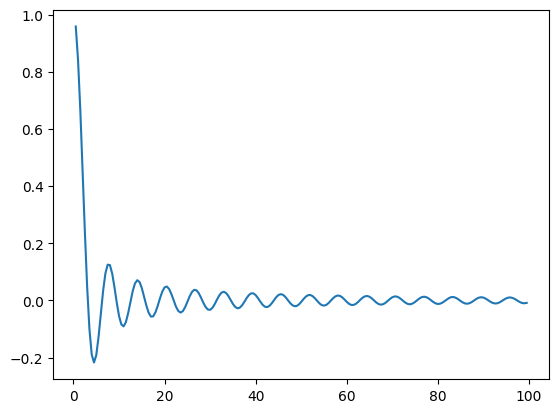

In [ ]:
func_1 = lambda x: np.sin(x)/x
plotter(func_1)

Plot for $log(x)$

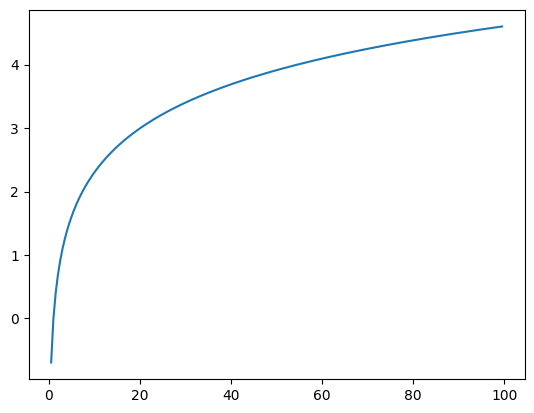

In [ ]:
func_1 = lambda x: np.log(x)
plotter(func_1)

Plot for $e^x$

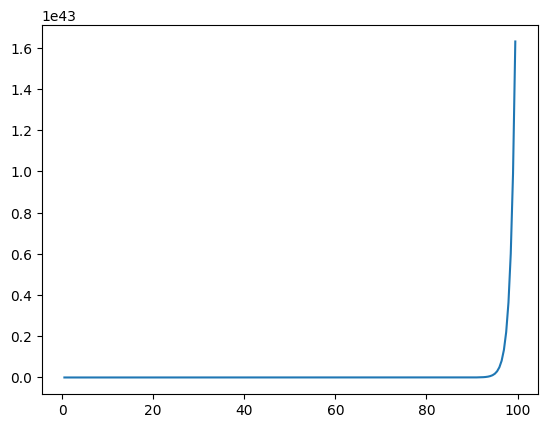

In [ ]:
func_1 = lambda x: np.exp(x)
plotter(func_1)

## Problem 10

In [ ]:
np.random.seed(42)
matrix = np.random.rand(20, 5)+1
df = pd.DataFrame(matrix, columns = ["a", "b", "c", "d", "e"])

print(f"The column with the highest standard deviation is column {df.std().idxmax()}")
print(f"The row with the lowest mean is row {df.mean(axis = 1).idxmin()}")

The column with the highest standard deviation is column c
The row with the lowest mean is row 11


## Problem 11

In [ ]:
df['f'] = df.sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
num_lt8_rows = (df['g'] == 'LT8').sum()
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(f"Number of rows where 'g' is 'LT8': {num_lt8_rows}")
print(f"Standard deviation of 'f' for 'LT8' rows: {std_lt8}")
print(f"Standard deviation of 'f' for 'GT8' rows: {std_gt8}")

Number of rows where 'g' is 'LT8': 18
Standard deviation of 'f' for 'LT8' rows: 0.4025886500663061
Standard deviation of 'f' for 'GT8' rows: 0.7956146881961926


## Problem 12

In [ ]:
a = np.random.rand(5, 5)
b = np.ones(shape = (5,))

print(f"Higher dimensional array:\n {a}\n")
print(f"Lower dimensional array:\n {b}\n")

print(f"Theoretically it should not be possible to add two matrices of different\nshapes, but if we do a+b, it would result in:\n {a+b}")

Higher dimensional array:
 [[0.03142919 0.63641041 0.31435598 0.50857069 0.90756647]
 [0.24929223 0.41038292 0.75555114 0.22879817 0.07697991]
 [0.28975145 0.16122129 0.92969765 0.80812038 0.63340376]
 [0.87146059 0.80367208 0.18657006 0.892559   0.53934224]
 [0.80744016 0.8960913  0.31800347 0.11005192 0.22793516]]

Lower dimensional array:
 [1. 1. 1. 1. 1.]

Theoretically it should not be possible to add two matrices of different
shapes, but if we do a+b, it would result in:
 [[1.03142919 1.63641041 1.31435598 1.50857069 1.90756647]
 [1.24929223 1.41038292 1.75555114 1.22879817 1.07697991]
 [1.28975145 1.16122129 1.92969765 1.80812038 1.63340376]
 [1.87146059 1.80367208 1.18657006 1.892559   1.53934224]
 [1.80744016 1.8960913  1.31800347 1.11005192 1.22793516]]


## Problem 13

In [ ]:
def argmin_manual(x):
  min = np.inf
  min_index = np.inf
  for i, j in enumerate(x):
    if(min > j):
      min = j
      min_index = i

  return min_index

np.random.seed(42)
a = np.random.randint(0, 10, size = 5)
print(f"Array: {a}")
print(f"Manual result: {argmin_manual(a)}")
print(f"Numpy result: {np.argmin(a)}")

Array: [6 3 7 4 6]
Manual result: 1
Numpy result: 1
